# linear regression of singal variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./ex1data1.txt", header=None, names=["Population", "Profit"])
data.head(2)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302


In [3]:
data.insert(loc=0, column="Ones", value=1.)
data.head()

,Ones,Population,Profit
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


In [4]:
cols = data.shape[1]
X = np.matrix(data.iloc[:, :cols-1])
y = np.matrix(data.iloc[:, cols-1:cols])
theta = np.matrix(np.zeros((cols - 1)))
y, theta

(matrix([[17.592  ],
         [ 9.1302 ],
         [13.662  ],
         [11.854  ],
         [ 6.8233 ],
         [11.886  ],
         [ 4.3483 ],
         [12.     ],
         [ 6.5987 ],
         [ 3.8166 ],
         [ 3.2522 ],
         [15.505  ],
         [ 3.1551 ],
         [ 7.2258 ],
         [ 0.71618],
         [ 3.5129 ],
         [ 5.3048 ],
         [ 0.56077],
         [ 3.6518 ],
         [ 5.3893 ],
         [ 3.1386 ],
         [21.767  ],
         [ 4.263  ],
         [ 5.1875 ],
         [ 3.0825 ],
         [22.638  ],
         [13.501  ],
         [ 7.0467 ],
         [14.692  ],
         [24.147  ],
         [-1.22   ],
         [ 5.9966 ],
         [12.134  ],
         [ 1.8495 ],
         [ 6.5426 ],
         [ 4.5623 ],
         [ 4.1164 ],
         [ 3.3928 ],
         [10.117  ],
         [ 5.4974 ],
         [ 0.55657],
         [ 3.9115 ],
         [ 5.3854 ],
         [ 2.4406 ],
         [ 6.7318 ],
         [ 1.0463 ],
         [ 5.1337 ],
         [ 1.

In [5]:
def costFunction(X, theta, y):
    """_summary_
    function: figure out the resultes of costfunction
    """
    substract = np.power((X*theta.T) - y, 2)
    return np.sum(substract) / 2*theta.shape[1]


In [6]:
def gradientDescent(X, theta, y, iters, alpha):
    """_summary_
    functino:find the min theta and 
    """
    circulation_times = theta.shape[1]
    results_theta = theta
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X* results_theta.T - y

        for j in range(circulation_times):
            results_theta[0, j] = results_theta[0, j] - (alpha / len(X))*np.sum(np.multiply(error, X[:, j]))
        cost[i] = costFunction(X, results_theta, y)
        
    return results_theta, cost
        
        

In [7]:
result_theta, cost = gradientDescent(X, theta, y, iters=1000, alpha=0.01)

result_theta, cost

(matrix([[-3.24140214,  1.1272942 ]]),
 array([1307.01495018, 1150.72915231, 1144.82401317, 1143.67434577,
        1142.67841896, 1141.69080674, 1140.70690122, 1139.72654438,
        1138.74971889, 1137.77641187, 1136.80661065, 1135.84030259,
        1134.87747512, 1133.9181157 , 1132.96221184, 1132.00975108,
        1131.06072104, 1130.11510935, 1129.17290369, 1128.23409181,
        1127.29866147, 1126.3666005 , 1125.43789676, 1124.51253815,
        1123.59051264, 1122.6718082 , 1121.75641289, 1120.84431478,
        1119.93550199, 1119.02996269, 1118.1276851 , 1117.22865745,
        1116.33286806, 1115.44030524, 1114.55095738, 1113.66481291,
        1112.78186027, 1111.90208798, 1111.02548458, 1110.15203865,
        1109.28173882, 1108.41457377, 1107.55053219, 1106.68960284,
        1105.83177451, 1104.97703602, 1104.12537626, 1103.27678412,
        1102.43124857, 1101.58875858, 1100.7493032 , 1099.91287148,
        1099.07945255, 1098.24903554, 1097.42160964, 1096.59716409,
        1

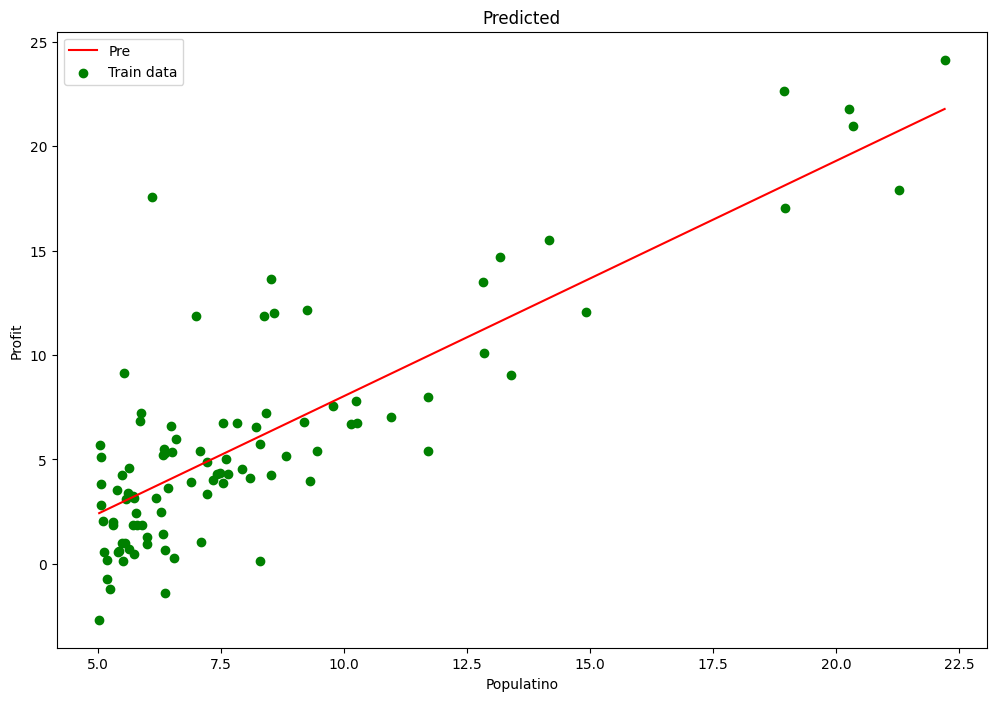

In [8]:
x = np.linspace(data.Population.min(), data.Population.max(), 300)
f = result_theta[0, 0] + result_theta[0, 1] * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label="Pre")
ax.scatter(data.Population, data.Profit, color='green', label="Train data")
ax.legend(loc=0)
ax.set_xlabel("Populatino")
ax.set_ylabel("Profit")
ax.set_title("Predicted")
plt.show()


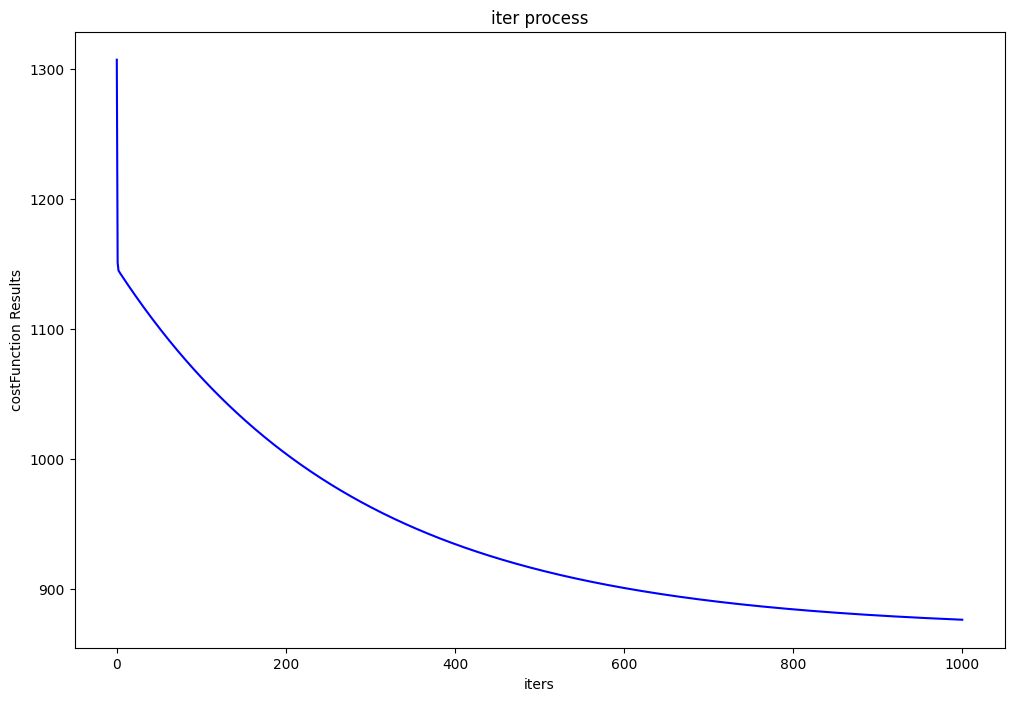

In [9]:
x = np.linspace(0, 1000, 1000)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, cost, color='blue')
ax.set_xlabel("iters")
ax.set_ylabel("costFunction Results")
ax.set_title("iter process")
plt.show()

In [11]:

def normalEqu(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [12]:
final_theta2 = normalEqu(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])